<a href="https://colab.research.google.com/github/geunsu-jo/Hands-On-ML/blob/main/winter_semester/13_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

## Fashion MNIST

In [ ]:
import tensorflow as tf

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape, X_test.shape)

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


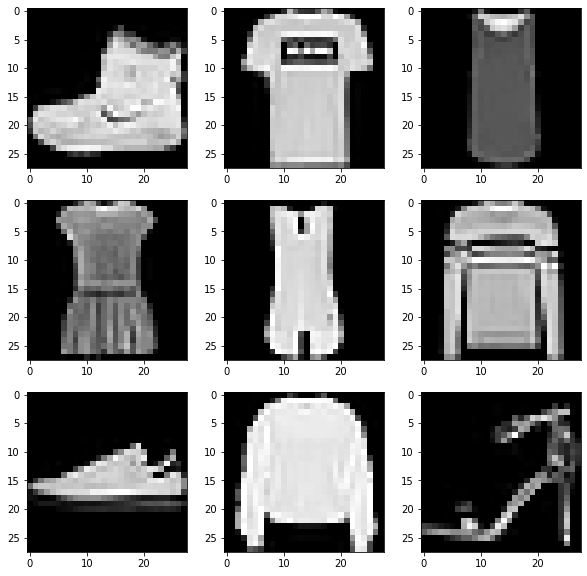

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for c in range(9):
  plt.subplot(3,3,c+1)
  plt.imshow(X_train[c].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________

In [ ]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 15s 6ms/step - loss: 0.6838 - accuracy: 0.7787 - val_loss: 0.4535 - val_accuracy: 0.8372
Epoch 2/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3297 - accuracy: 0.8790 - val_loss: 0.3711 - val_accuracy: 0.8650
Epoch 3/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2631 - accuracy: 0.9073 - val_loss: 0.3718 - val_accuracy: 0.8745
Epoch 4/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2162 - accuracy: 0.9208 - val_loss: 0.4213 - val_accuracy: 0.8751
Epoch 5/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1798 - accuracy: 0.9362 - val_loss: 0.4477 - val_accuracy: 0.8703
Epoch 6/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1480 - accuracy: 0.9463 - val_loss: 0.5444 - val_accuracy: 0.8627
Epoch 7/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1255 - accuracy: 0.9544 - val_loss: 0.5975 - val_accuracy

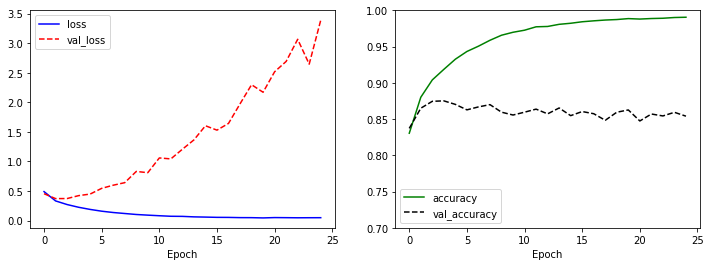

313/313 [==============================] - 1s 2ms/step - loss: 3.6681 - accuracy: 0.8493


[3.6680757999420166, 0.8493000268936157]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(X_test, y_test)

## 풀링 레이어 + 드랍아웃을 사용해서 개선

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32),
  tf.keras.layers.MaxPool2D(strides=(2,2)),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
  tf.keras.layers.MaxPool2D(strides=(2,2)),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [ ]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6256 - accuracy: 0.7755 - val_loss: 0.3645 - val_accuracy: 0.8698
Epoch 2/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3219 - accuracy: 0.8838 - val_loss: 0.3340 - val_accuracy: 0.8824
Epoch 3/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2684 - accuracy: 0.9029 - val_loss: 0.3254 - val_accuracy: 0.8855
Epoch 4/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2353 - accuracy: 0.9156 - val_loss: 0.3180 - val_accuracy: 0.8929
Epoch 5/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2094 - accuracy: 0.9237 - val_loss: 0.3521 - val_accuracy: 0.8838
Epoch 6/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1851 - accuracy: 0.9326 - val_loss: 0.3339 - val_accuracy: 0.8915
Epoch 7/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1717 - accuracy: 0.9367 - val_loss: 0.3826 - val_accuracy:

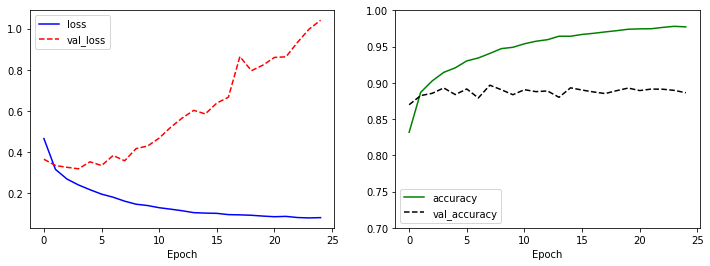

313/313 [==============================] - 1s 2ms/step - loss: 1.1091 - accuracy: 0.8822


[1.1091430187225342, 0.8822000026702881]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(X_test, y_test)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32),
  tf.keras.layers.MaxPool2D(strides=(2,2)),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
  tf.keras.layers.MaxPool2D(strides=(2,2)),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dropout(rate=0.3),
  tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [ ]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6943 - accuracy: 0.7497 - val_loss: 0.3615 - val_accuracy: 0.8675
Epoch 2/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3604 - accuracy: 0.8726 - val_loss: 0.4055 - val_accuracy: 0.8537
Epoch 3/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3116 - accuracy: 0.8875 - val_loss: 0.3904 - val_accuracy: 0.8631
Epoch 4/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2808 - accuracy: 0.8939 - val_loss: 0.3081 - val_accuracy: 0.8931
Epoch 5/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2613 - accuracy: 0.9043 - val_loss: 0.3521 - val_accuracy: 0.8795
Epoch 6/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2483 - accuracy: 0.9101 - val_loss: 0.3293 - val_accuracy: 0.8943
Epoch 7/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2369 - accuracy: 0.9147 - val_loss: 0.4022 - val_accuracy:

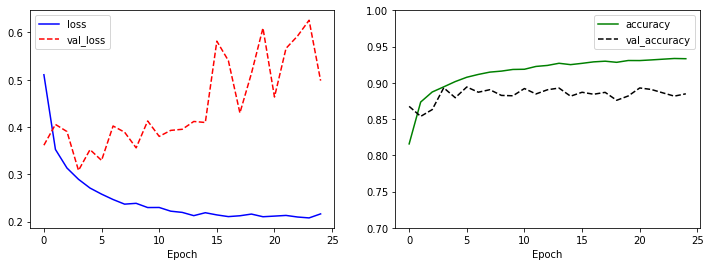

313/313 [==============================] - 1s 2ms/step - loss: 0.5127 - accuracy: 0.8837


[0.5126855969429016, 0.8837000131607056]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(X_test, y_test)

## VGGNet 스타일을 이용해서 퍼포먼스 높이기

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Dense(units=256, activation='relu'),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 256)        

In [ ]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 11s 7ms/step - loss: 0.8628 - accuracy: 0.6813 - val_loss: 0.3352 - val_accuracy: 0.8752
Epoch 2/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3763 - accuracy: 0.8640 - val_loss: 0.2841 - val_accuracy: 0.8949
Epoch 3/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3343 - accuracy: 0.8797 - val_loss: 0.2656 - val_accuracy: 0.9027
Epoch 4/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3008 - accuracy: 0.8897 - val_loss: 0.2487 - val_accuracy: 0.9063
Epoch 5/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2939 - accuracy: 0.8929 - val_loss: 0.2280 - val_accuracy: 0.9126
Epoch 6/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2804 - accuracy: 0.8999 - val_loss: 0.2295 - val_accuracy: 0.9157
Epoch 7/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2630 - accuracy: 0.9043 - val_loss: 0.2235 - val_ac

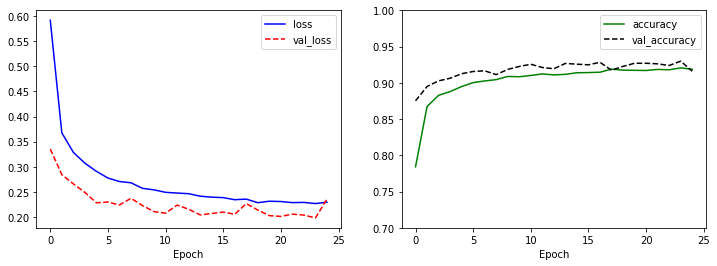

313/313 [==============================] - 1s 3ms/step - loss: 0.2586 - accuracy: 0.9093


[0.25857365131378174, 0.9093000292778015]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(X_test, y_test)